# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Reading the data

In [1]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

So there are 1460 rows and 81 columns

In [4]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
## reading the numerical columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There seems to be 38 numeric columns and others as category columns

# Data Cleaning

In [6]:
#Sum of null value
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Checking the percentage of missing values
pd.set_option('display.max_rows', 500)
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

So there are certain columns with high missing values.

In [8]:
#checking value counts of columns
for c in df.columns:
    print(df[c].astype('category').value_counts(dropna=False))
    print("="*40)

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
68.0      19
24.0      19
64.0      19
73.0      18
55.0      17
72.0      17
79.0      17
63.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
57.0      12
71.0      12
67.0      12
40.0      12
82.0      12
43.0      12
76.0      11
69.0      11
53.0      10
34.0      10
86.0      10
88.0      10
92.0      10
35.0       9
77.0       9
84.0       9
62.0       9
44

Removing some heavily skewed columns

In [9]:
df.drop(["Street","Utilities","Condition2","RoofMatl","KitchenAbvGr","PoolQC","MiscFeature","MiscVal","PoolArea","3SsnPorch"], axis=1,inplace=True)

In [10]:
# dropping the columns with high Null values.
df = df.drop(['Alley','Fence'],axis=1)


In [11]:
# dropping some redundant columns
df.drop("GarageYrBlt",axis = 1, inplace=True)
df.drop("YearRemodAdd",axis = 1, inplace=True)
df.drop("Id",axis = 1, inplace=True)

In [12]:
## imputing the nan values with some meaningful values

In [13]:
df["FireplaceQu"].fillna("No fireplace", inplace = True)
df['FireplaceQu'].value_counts(dropna=False)

No fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [14]:
df["GarageQual"].fillna("No garage", inplace = True)
df['GarageQual'].value_counts(dropna=False)

TA           1311
No garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [15]:
df["GarageCond"].fillna("No garage", inplace = True)
df['GarageCond'].value_counts(dropna=False)

TA           1326
No garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [16]:
df["BsmtFinType1"].fillna("No basement", inplace = True)
df['BsmtFinType1'].value_counts(dropna=False)

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No basement     37
Name: BsmtFinType1, dtype: int64

In [17]:
df["BsmtCond"].fillna("No basement", inplace = True)
df['BsmtCond'].value_counts(dropna=False)

TA             1311
Gd               65
Fa               45
No basement      37
Po                2
Name: BsmtCond, dtype: int64

In [18]:
df["BsmtQual"].fillna("No basement", inplace = True)
df['BsmtQual'].value_counts(dropna=False)

TA             649
Gd             618
Ex             121
No basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [19]:
df["BsmtExposure"].fillna("No basement", inplace = True)
df['BsmtExposure'].value_counts(dropna=False)

No             953
Av             221
Gd             134
Mn             114
No basement     38
Name: BsmtExposure, dtype: int64

So now we have imputed the nun values with some meaningful values for the categorical column.

In [20]:
## for the LotFrontage column we will impute the missing values with the median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [21]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
GarageType,5.55
GarageFinish,5.55
BsmtFinType2,2.60
MasVnrType,0.55
MasVnrArea,0.55
Electrical,0.07


In [22]:
## we will impute the null values with 'mode' for the categorical columns with ess null values
for col in ('Electrical', 'GarageType', 'GarageFinish','MasVnrArea','MasVnrType','BsmtFinType2'):
    
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
# checking the Null value
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars  

so now the data is cleaned.

And we can proceed with EDA 

In [24]:
df.shape

(1460, 66)

## Outlier treatment

In [25]:
# check for Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [26]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SalePrice'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

So now we have removed the outliers from the numerical columns

# EDA

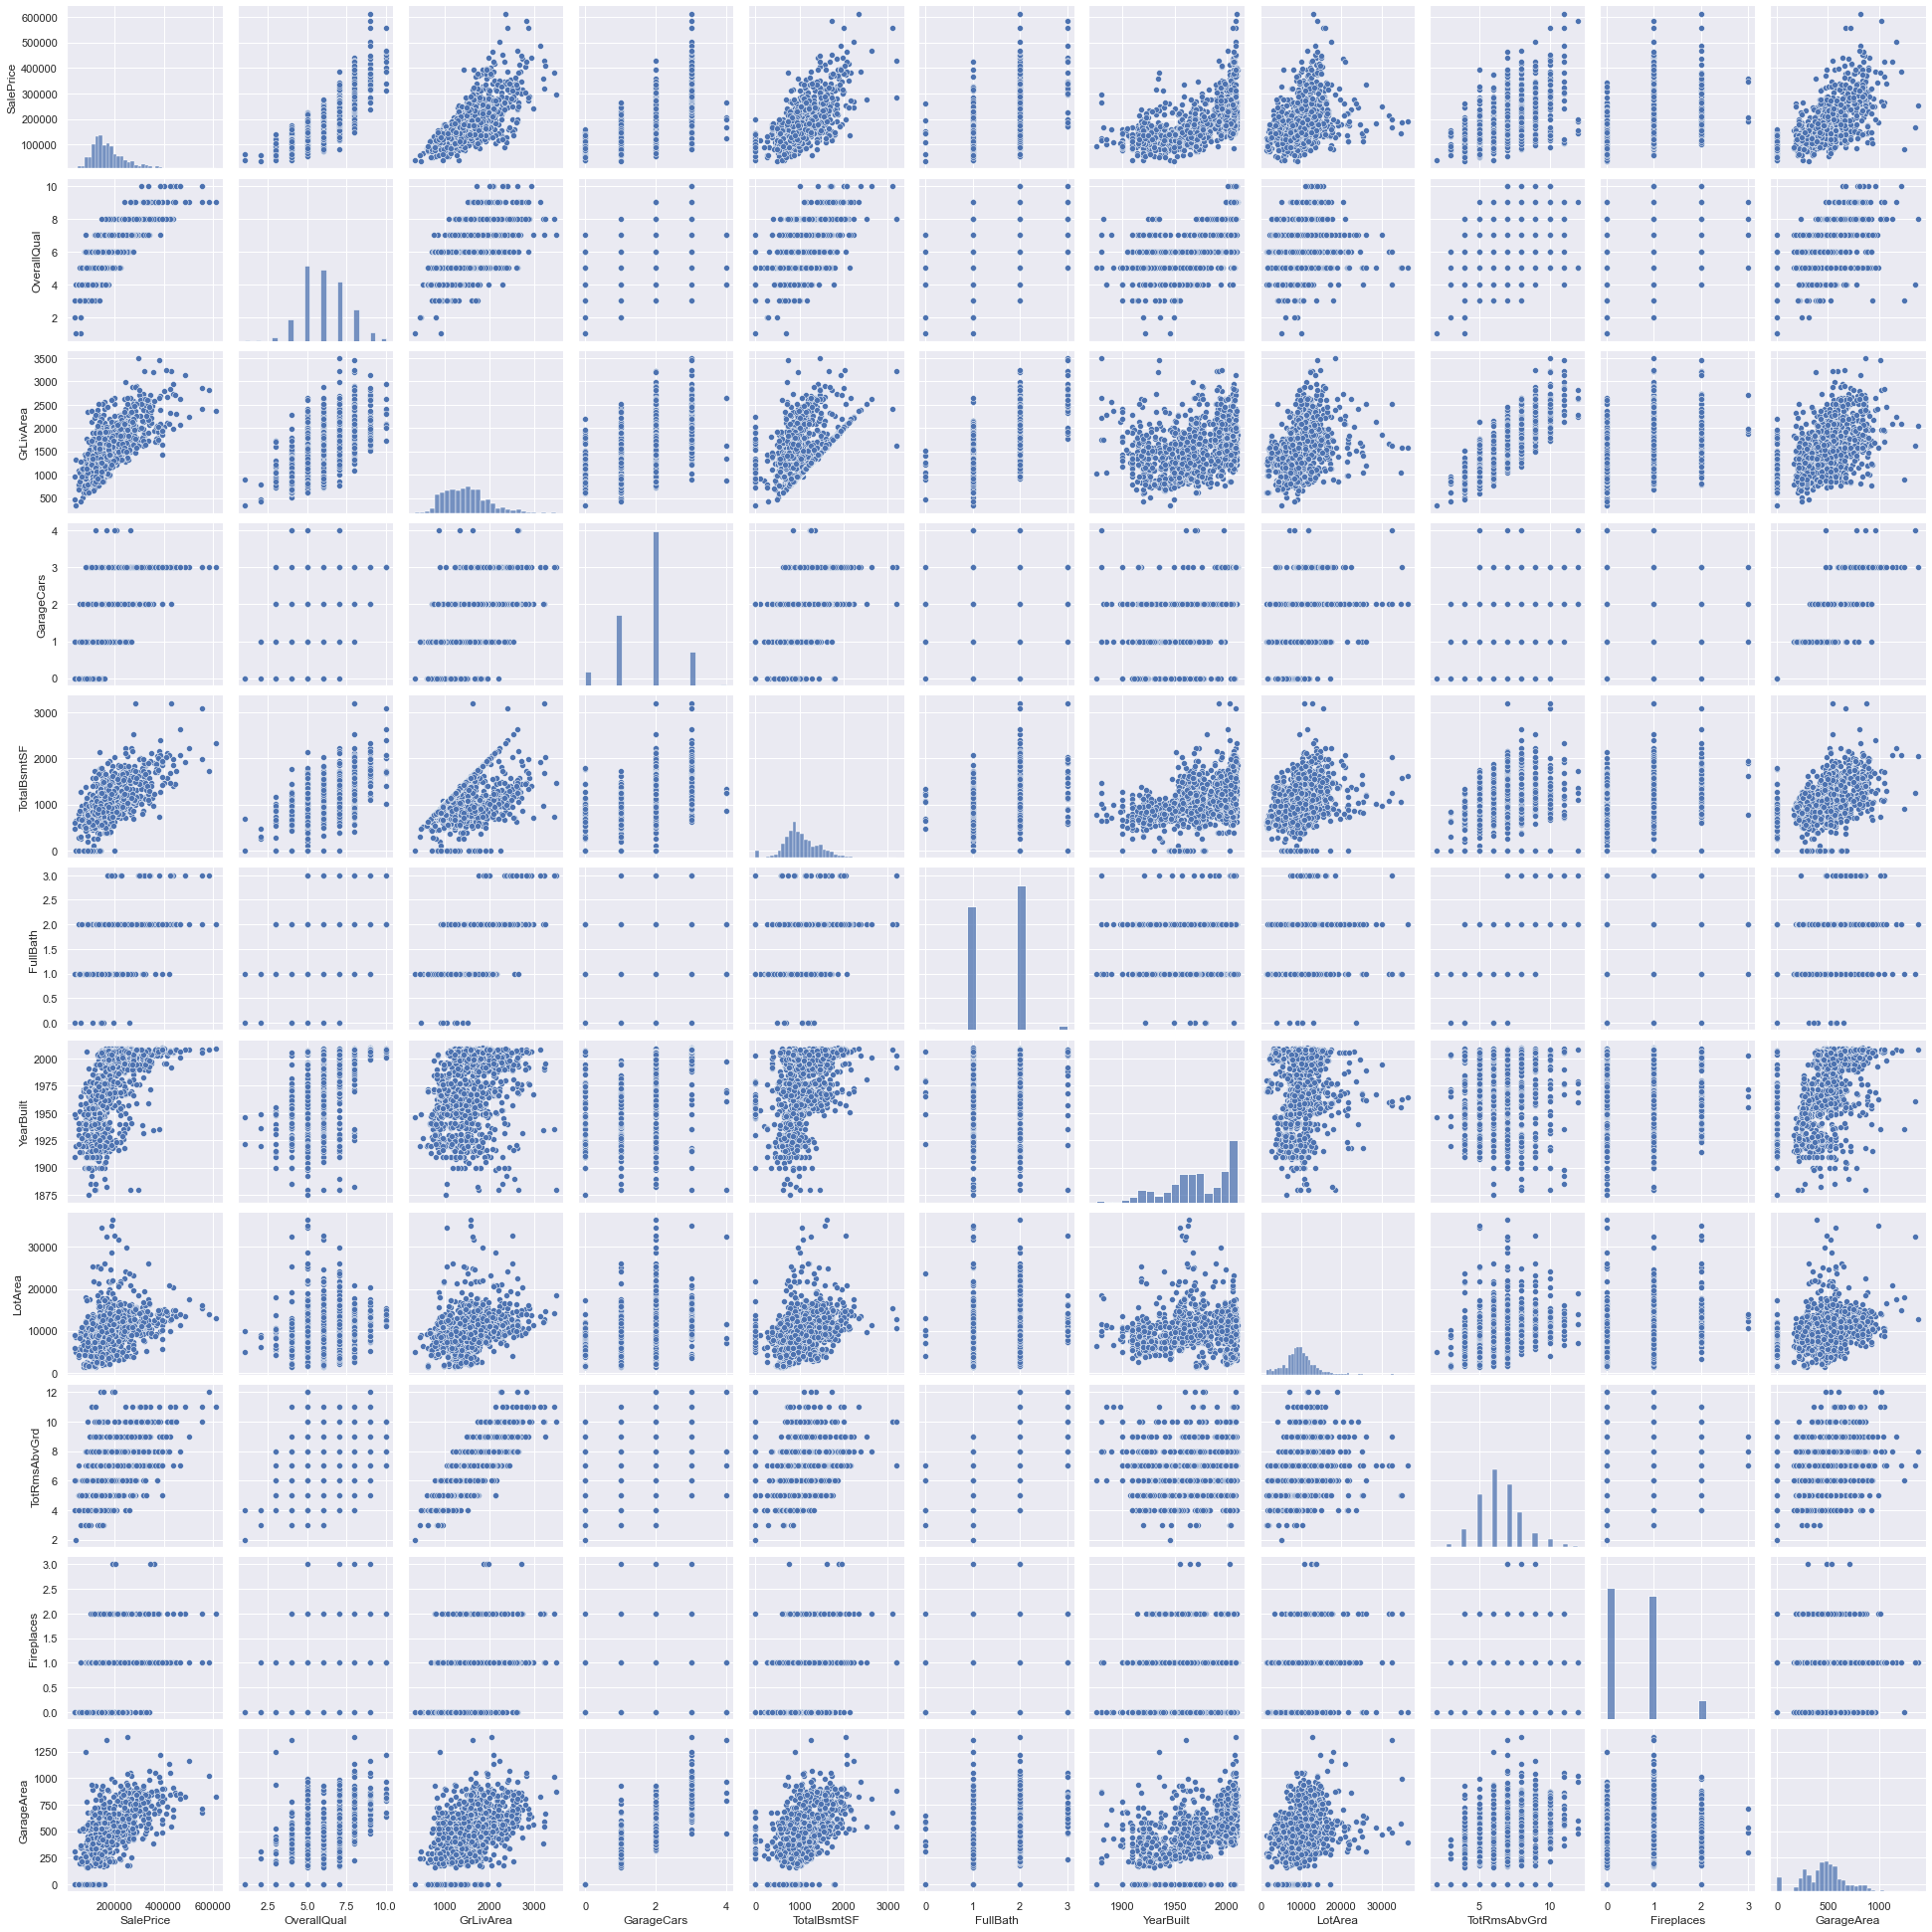

In [27]:
#scatterplot for linear relation between the target variable and the independent features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','LotArea','TotRmsAbvGrd','Fireplaces','GarageArea']
sns.pairplot(df[cols], size = 2.5)
plt.show();

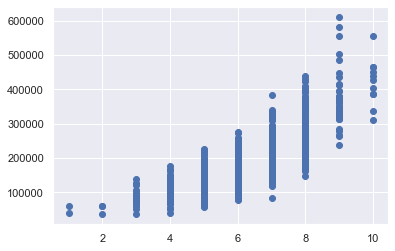

In [28]:
plt.scatter(df.OverallQual,df.SalePrice)

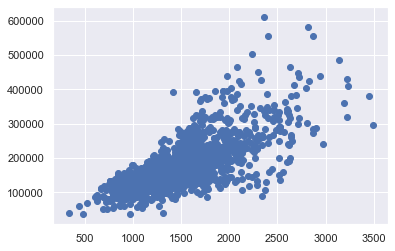

In [29]:
plt.scatter(df.GrLivArea,df.SalePrice)

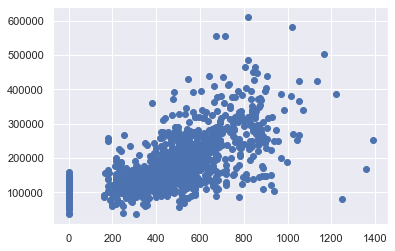

In [30]:
plt.scatter(df.GarageArea,df.SalePrice)

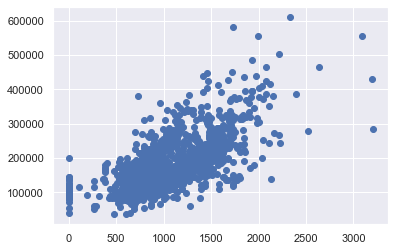

In [31]:
plt.scatter(df.TotalBsmtSF,df.SalePrice)

Text(0.5, 1.0, 'Basement Condition')

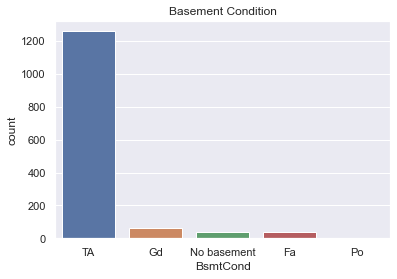

In [32]:
# Checking Basement counts
sns.countplot(x='BsmtCond', data= df)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Basement Quality')

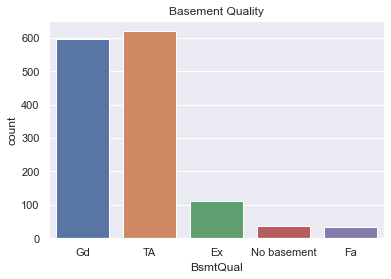

In [33]:
## Checking Basement counts
sns.countplot(x='BsmtQual', data= df)
plt.title('Basement Quality')

Text(0.5, 1.0, 'Garage Quality')

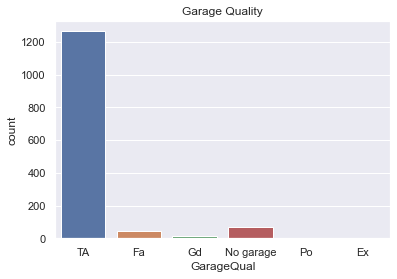

In [34]:
## Checking Basement counts
sns.countplot(x='GarageQual', data= df)
plt.title('Garage Quality')

Text(0.5, 1.0, 'Fireplace Quality')

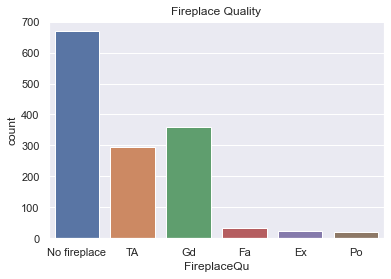

In [35]:
## Checking Basement counts
sns.countplot(x='FireplaceQu', data= df)
plt.title('Fireplace Quality')

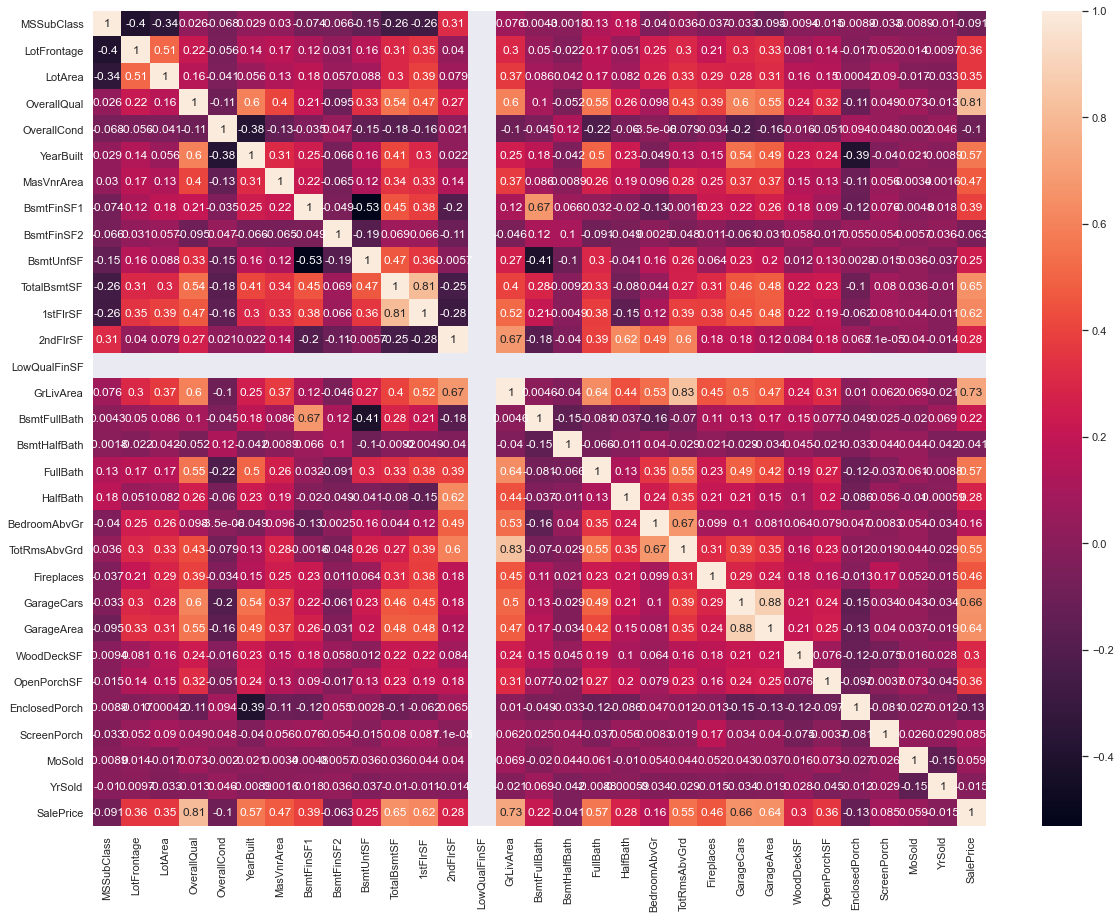

In [36]:
# To check the correlation among continous variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

It can be infered from the correlation plot that there are lot of correlated columns with high collinearity

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

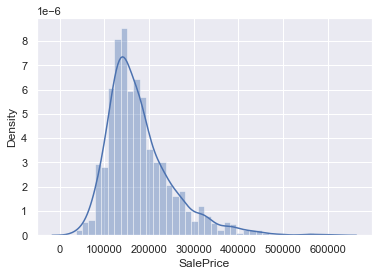

In [37]:
sns.distplot(df['SalePrice'])

The target variable is highly skewed towards right.

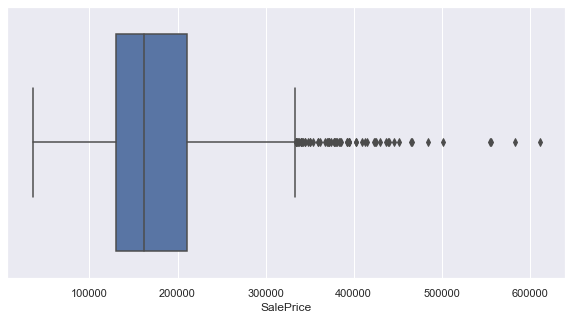

In [38]:
plt.figure(figsize = (10, 5))

sns.boxplot(x = "SalePrice", data = df)
df['SalePrice']=np.log(df['SalePrice'])

From the box plots it can be seen there are outliers in the target variable.

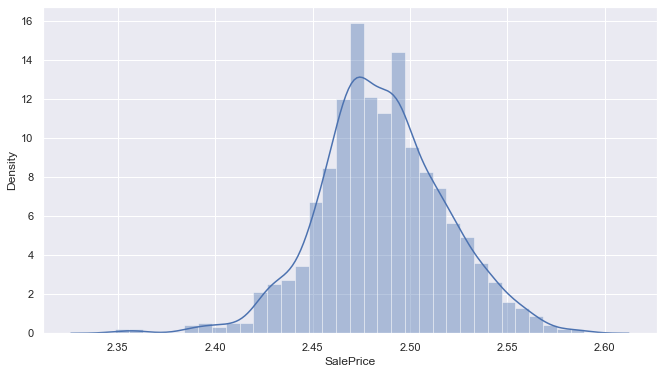

In [39]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(df["SalePrice"]))
df['SalePrice']=np.log(df['SalePrice'])

We have made the the salePrice column normally distributed with outliers handled

In [40]:
## categorical columns
cat_col = df.select_dtypes(include=['object'])
cat_col.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [41]:
# Convert categorical columns into Dummy variable
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


# Split the data into train and test sets

In [42]:
#Splitting the data into train and test set
y = df.pop('SalePrice')
y.head()

0    2.505338
1    2.493950
2    2.510994
3    2.472277
4    2.520050
Name: SalePrice, dtype: float64

In [43]:
X = df
X.shape

(1400, 221)

In [44]:
#importing train_test_split to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,30,40.0,4800,4,7,1916,0.0,197,0,999,...,0,0,0,0,1,0,0,0,1,0
1216,90,68.0,8930,6,5,1978,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1072,50,50.0,7585,5,3,1948,0.0,0,0,810,...,0,0,0,0,1,0,0,0,1,0
1354,60,69.0,10316,7,5,2000,0.0,735,0,257,...,0,0,0,0,1,0,0,0,1,0
870,20,60.0,6600,5,5,1962,0.0,0,0,894,...,0,0,0,0,1,0,0,0,1,0


In [45]:
##   Scaling the numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
801,30,40.0,4800,4,7,1916,0.0,197,0,999,...,5,0,2,440,0,0,0,0,7,2007
1216,90,68.0,8930,6,5,1978,0.0,0,0,0,...,8,0,2,539,0,0,0,0,4,2010
1072,50,50.0,7585,5,3,1948,0.0,0,0,810,...,7,1,1,280,0,0,0,0,8,2006
1354,60,69.0,10316,7,5,2000,0.0,735,0,257,...,7,1,3,839,0,184,0,0,6,2008
870,20,60.0,6600,5,5,1962,0.0,0,0,894,...,5,0,1,308,0,0,0,0,8,2009


In [46]:
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [47]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,0.058824,0.118012,0.094881,0.333333,0.75,0.303704,0.0,0.090037,0.0,0.427654,...,0,0,0,0,1,0,0,0,1,0
1216,0.411765,0.291925,0.212803,0.555556,0.50,0.762963,0.0,0.000000,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
1072,0.176471,0.180124,0.174400,0.444444,0.25,0.540741,0.0,0.000000,0.0,0.346747,...,0,0,0,0,1,0,0,0,1,0
1354,0.235294,0.298137,0.252377,0.666667,0.50,0.925926,0.0,0.335923,0.0,0.110017,...,0,0,0,0,1,0,0,0,1,0
870,0.000000,0.242236,0.146275,0.444444,0.50,0.644444,0.0,0.000000,0.0,0.382705,...,0,0,0,0,1,0,0,0,1,0


In [48]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,...,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,0.216261,0.303467,0.233644,0.560531,0.565832,0.721677,0.090195,0.194362,0.039013,0.249641,...,0.004264,0.004264,0.089552,0.003198,0.864606,0.002132,0.011727,0.013859,0.815565,0.091684
std,0.255009,0.123766,0.115899,0.153578,0.138350,0.220712,0.149527,0.194420,0.139660,0.197829,...,0.065198,0.065198,0.285692,0.056493,0.342327,0.046151,0.107712,0.116969,0.388045,0.288734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.174435,0.444444,0.500000,0.592593,0.000000,0.000000,0.000000,0.093322,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.298137,0.225609,0.555556,0.500000,0.733333,0.000000,0.164534,0.000000,0.207192,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.360248,0.283414,0.666667,0.625000,0.933333,0.147033,0.318441,0.000000,0.351562,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data has been scaled with numerical features value between 0 and 1.

# Model Building 

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
##Considering 50 features according to RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
# top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 146),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 143),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 40),
 ('BsmtHalfBath', False, 151),
 ('FullBath', False, 45),
 ('HalfBath', False, 87),
 ('BedroomAbvGr', False, 112),
 ('TotRmsAbvGrd', False, 56),
 ('Fireplaces', False, 54),
 ('GarageCars', True, 1),
 ('GarageArea', False, 34),
 ('WoodDeckSF', False, 20),
 ('OpenPorchSF', False, 13),
 ('EnclosedPorch', False, 18),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 166),
 ('YrSold', False, 172),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 141),
 ('LotShape_IR3', False, 140),
 ('LotShape_Reg'

In [51]:
col_rfe = X_train.columns[rfe.support_]
col_rfe


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageCars', 'ScreenPorch', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_Stucco', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       'ExterQual_Fa', 'Foundation_Stone', 'BsmtCond_Po',
       'BsmtFinType1_No basement', 'Heating_GasA', 'Heating_GasW',
       'Heating_Wall', 'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj2',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No garage',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_No garage', 'GarageCond_Po', 'GarageCond_TA',
       'SaleType_CWD', 'SaleCondition_AdjLand'],
      dtype='objec

In [52]:
##eliminating out the features rejected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=171)

In [53]:
lm1=lm.fit(X_train, y_train)
#coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

2.3360779699078678
[-1.23717284e-03  5.27088473e-03  1.50405530e-02  3.58667922e-02
  3.00867958e-02  2.05161336e-02 -1.04187016e-03 -5.39277673e+09
 -2.23302364e+09 -5.75755322e+09  7.90184744e+09  7.83092110e+09
  4.35923078e+09 -6.72205814e+09 -8.42351672e+09  3.04756593e-03
  6.36950135e-04  6.21476769e-03  3.01086903e-03  3.75205278e-03
  2.15053558e-03  2.10368633e-03  9.56830382e-03  6.72245026e-03
  5.27128577e-03  5.34588099e-03  4.63953614e-03  9.29104909e-03
  1.84834003e-04 -4.50611115e-05  3.73718739e-02  2.66469717e-02
  3.03180218e-02  2.66354084e-02  9.74506140e-04  1.75924995e-03
  8.46058130e-04  3.31474841e-03 -3.50096822e-03  4.75913286e-04
  2.02628970e-03 -3.93760204e-03 -8.85692239e-03 -1.45255029e-03
 -6.63697720e-05 -6.55634701e-03 -3.81864902e+08 -7.82345235e-03
 -2.19553709e-03 -1.30340084e-03 -5.62942028e-03  4.06759977e-03
 -9.41711664e-03 -5.56409359e-03 -6.53639436e-03 -1.85160637e-02
 -9.43970680e-03 -8.80998373e-03 -9.88075137e-03 -1.08968019e-02
 -3.50

In [54]:
#importing libraries for model metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
# calculating the metrics such as R2 score, RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.917061616809258
0.8877820013308646
0.08311466444890009
0.052547731192533684
8.860838427388069e-05
0.00011373967790591706


In [56]:
#Check the shape of train and test
X_train_new=X_train[col_rfe]
X_test_new=X_test[col_rfe]


# Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

In [58]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
print(ridge_model_cv.best_params_)


{'alpha': 2.0}


Optimal value of alpha is 2.0

In [60]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_new, y_train)
ridge.coef_

array([ 0.0093531 ,  0.01267105,  0.05440443,  0.02860673,  0.03481986,
        0.02194571,  0.00211635,  0.00633528,  0.02019146,  0.03060521,
        0.01617907,  0.03682492,  0.02064413,  0.00601188,  0.01883841,
        0.00756446,  0.01367591,  0.00792239,  0.00987704, -0.00842132,
        0.01078458, -0.01034913,  0.00668726, -0.00140501,  0.00148786,
        0.00575547,  0.00148786, -0.00566944, -0.010474  ,  0.00716205,
        0.00184077,  0.00024823,  0.00981239,  0.00820606,  0.01027889,
       -0.0049246 , -0.00370677, -0.01163829, -0.0028769 ,  0.00340311,
       -0.00260851, -0.00370677,  0.00034285, -0.0008696 , -0.00071699,
       -0.00260851,  0.000785  , -0.00203613,  0.0051837 ,  0.00364056])

In [61]:
# calculating the metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9129070439700013
0.8867296434633034
0.0872780676185663
0.053040513268482095
9.30469804035888e-05
0.00011480630577593526


# Lasso regression

In [62]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


The alpha value from the lasso regression is 0.0001

In [64]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [65]:
lasso.coef_

array([ 3.42069021e-03,  1.07599353e-02,  6.75469808e-02,  2.85668846e-02,
        3.13468176e-02,  1.60917733e-02,  0.00000000e+00,  0.00000000e+00,
        2.29181742e-02,  5.00092286e-03,  0.00000000e+00,  6.56540091e-02,
        1.95189314e-02,  0.00000000e+00,  1.03696285e-02,  0.00000000e+00,
        7.72281750e-03, -0.00000000e+00,  6.11523375e-03, -6.66080848e-04,
        4.52854932e-03, -6.99700567e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.98810858e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.72159604e-06, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.42684138e-03, -0.00000000e+00,  8.61518207e-04, -0.00000000e+00,
        0.00000000e+00, -4.51322591e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [66]:
# calculating the metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9032461888413333
0.8821326979373872
0.09695945639681186
0.0551931007381159
0.0001033682904017184
0.00011946558601323788


In [67]:
metric2

[0.9129070439700013,
 0.8867296434633034,
 0.0872780676185663,
 0.053040513268482095,
 0.009646086273903464,
 0.010714770449054672]

In [68]:
# Creating a table containing all the metrics:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.917062,0.912907,0.903246
1,R2 Score (Test),0.887782,0.886730,0.882133
2,RSS (Train),0.083115,0.087278,0.096959
3,RSS (Test),0.052548,0.053041,0.055193
4,MSE (Train),0.009413,0.009646,0.010167
5,MSE (Test),0.010665,0.010715,0.010930


The table showing the metrics for the LR, Ridge and Lasso regression

# Model Evaluation

In [69]:
ridge_pred = ridge.predict(X_test_new)

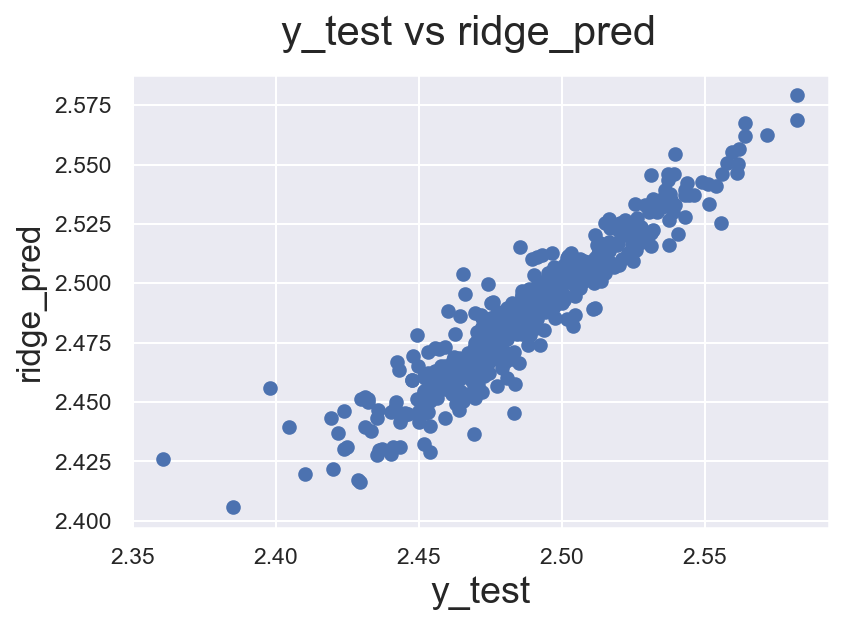

In [70]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=150)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

## Distribution of error terms:

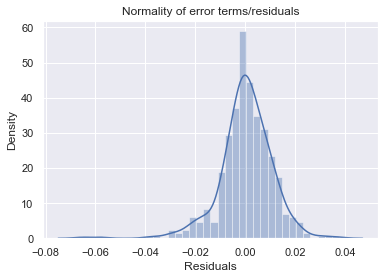

In [71]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Conclusion:

The variables significant for predicting the price:
    
    LotFrontage
    LotArea
    OverallQual
    OverallCond
    YearBuilt
    BsmtFinSF1
    BsmtFinSF2
    BsmtUnfSF
    TotalBsmtSF
    

All the three models are able to explain the test set prediction with R2 score as:
    
                                Train                 Test     
        
    Linear regression            0.91                 0.88
    
    Ridge Regression             0.91                 0.88
    
    Lasso Regression             0.90                 0.88

In [72]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.917062,0.912907,0.903246
1,R2 Score (Test),0.887782,0.886730,0.882133
2,RSS (Train),0.083115,0.087278,0.096959
3,RSS (Test),0.052548,0.053041,0.055193
4,MSE (Train),0.009413,0.009646,0.010167
5,MSE (Test),0.010665,0.010715,0.010930


# Coding Questions::

# Question1:
    
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer:
    
Optimal Value of Ridge regression is 2.0 

Optimal Value of Lasso regression is 0.0001.

If we choose the doubled value of ridge regression then R2 value of train set increased while that of test set remains same almost.

If we doubled the lasso alpha value the R2score of training data as well as test data decreased.

Most important variables are: LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF


Ridge Regession with changed alpha value

In [73]:
#Doubling the alpha value
alpha = 4
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train_new, y_train)

Ridge(alpha=4)

In [74]:
# calculating the metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_new)
y_pred_test = ridge2.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.9085689111127524
0.8838387945054055
0.091625420953581
0.05439419588409997
9.76816854515789e-05
0.00011773635472748912


Lasso Regression with changed value

In [75]:
#Doubling the alpha value
alpha =0.0002
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train_new, y_train) 

Lasso(alpha=0.0002)

In [76]:
# calculating the metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train_new)
y_pred_test = lasso2.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.892568756118442
0.8728931379014366
0.10765958345255461
0.05951966085204126
0.00011477567532255288
0.00012883043474467805


If we doubled the lasso aplpha value the R2score of training data as well as test data decresed.

In [77]:
#Important features
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Ridge2'] = ridge2.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(60)

,Ridge,Lasso,Ridge2,Lasso2
LotFrontage,0.009353,0.003421,0.009186,0.000000
LotArea,0.012671,0.010760,0.011374,0.005623
OverallQual,0.054404,0.067547,0.051103,0.071748
OverallCond,0.028607,0.028567,0.025508,0.021598
YearBuilt,0.034820,0.031347,0.033234,0.027436
BsmtFinSF1,0.021946,0.016092,0.022015,0.015332
BsmtFinSF2,0.002116,0.000000,0.001824,0.000000
BsmtUnfSF,0.006335,0.000000,0.007107,0.000000
TotalBsmtSF,0.020191,0.022918,0.020719,0.022537
1stFlrSF,0.030605,0.005001,0.028767,0.001290


The significant variables are:
    
LotFrontage

LotArea

OverallQual

OverallCond

YearBuilt

BsmtFinSF1

BsmtFinSF2

BsmtUnfSF

TotalBsmtSF

# Question 3:
    
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Top predictors of Lasso Regression:
LotArea

OverallQual

OverallCond

YearBuilt

BsmtFinSF1

In [78]:
X_train2 = X_train_new.drop(['LotArea','OverallQual','YearBuilt','OverallCond','BsmtFinSF1'],axis=1)
X_test2 = X_test_new.drop(['LotArea','OverallQual','YearBuilt','OverallCond','BsmtFinSF1'],axis=1)

LASSO

In [79]:
alpha =0.0001
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train) 

Lasso(alpha=0.0001)

In [80]:
# calculating the metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8123700313282036
0.8013794290099961
0.18802876649824488
0.09300700865698923
0.00020045710714098602
0.00020131387155192474


R2score of training and testing data has decreased drastically.

In [81]:
#Important predictor features
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train_new.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(30)

,Lasso21
LotFrontage,0.001441
BsmtFinSF2,-0.006196
BsmtUnfSF,-0.010862
TotalBsmtSF,0.067126
1stFlrSF,0.000000
2ndFlrSF,0.000000
GrLivArea,0.088105
GarageCars,0.049228
ScreenPorch,0.000000
MSZoning_FV,0.022872


Top variables after dropping the top five features:
    
LotFrontage

BsmtFinSF2

BsmtUnfSF

TotalBsmtSF

1stFlrSF

